# Mental Health HPSA data analysis

Introduction to Data Analysis, Reporting 2  
Group 7: Julia Ingram, Chuqin Jiang, Richard Abbey  

This workbook examines a dataset of federally designated mental health healthcare provider shortage areas (HPSAs), downloaded on 10/18/21 from the Health Resources & Service Administration's website (https://data.hrsa.gov/data/download). An explanation of the shortage areas and how they are designated can be found in the federal register, here: https://www.ecfr.gov/current/title-42/chapter-I/subchapter-A/part-5

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [66]:
#Reading in the HPSA file
HPSAs = pd.read_csv('BCD_HPSA_FCT_DET_MH.csv')

In [67]:
HPSAs.dtypes #Understanding the datatypes

HPSA Name                                                                    object
HPSA ID                                                                      object
Designation Type                                                             object
HPSA Discipline Class                                                        object
HPSA Score                                                                    int64
Primary State Abbreviation                                                   object
HPSA Status                                                                  object
HPSA Designation Date                                                        object
HPSA Designation Last Update Date                                            object
Metropolitan Indicator                                                       object
HPSA Geography Identification Number                                         object
HPSA Degree of Shortage                                                     

We'll want the dates as datetime64 so we can work with them

In [79]:
HPSAs['HPSA Designation Date'] = HPSAs['HPSA Designation Date'].astype(np.datetime64)
HPSAs['Withdrawn Date'] = HPSAs['Withdrawn Date'].astype(np.datetime64)

The HPSA Geographic Identification Number is our unique identifier. So we want it to be a number so it will be represented in the summary stats. Since all facility HPSAs have the string value POINT attached to them, we'll cast the ID as an integer in the population and geography subsets later

### Separating different HPSA Types
Subsetting the data by type: geographic, population and facility HPSA

In [4]:
facilityTypes = ['Correctional Facility', 'Federally Qualified Health Center', 'Federally Qualified Health Center Look A Like',
                 'Indian Health Service, Tribal Health, and Urban Indian Health Organizations', 'Rural Health Clinic',
                 'Other Facility', 'State Mental Hospital']
geoTypes = ['Geographic HPSA', 'High Needs Geographic HPSA']

In [80]:
facilityHPSAs = HPSAs[HPSAs['Designation Type'].isin(facilityTypes)==True]
geoHPSAs = HPSAs[HPSAs['Designation Type'].isin(geoTypes)==True]
popHPSAs = HPSAs[HPSAs['Designation Type']=='HPSA Population']

### Summary statistics
Note this overview includes both designated and withdrawn HPSAs

In [81]:
#Turning the Geo ID into a number
geoHPSAs['HPSA Geography Identification Number']= geoHPSAs['HPSA Geography Identification Number'].astype(int)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
#Geographic summary stats
geoHPSAs.describe()

,HPSA Score,HPSA Geography Identification Number,HPSA FTE,HPSA Designation Population,% of Population Below 100% Poverty,Longitude,Latitude,Common Postal Code,Common State FIPS Code,Discipline Class Number,HPSA Estimated Served Population,HPSA Estimated Underserved Population,HPSA Resident Civilian Population,HPSA Shortage,Primary State FIPS Code,State FIPS Code,Unnamed: 65
count,10855.000000,1.085500e+04,10412.000000,1.084000e+04,8825.000000,0.0,0.0,0.0,10855.000000,10855.0,8.840000e+03,8.840000e+03,2.250000e+03,9881.000000,10855.000000,10855.000000,0.0
mean,12.174390,1.385425e+10,5.836178,1.936002e+05,19.832669,NaN,NaN,NaN,26.161769,7.0,1.390708e+05,7.477177e+04,2.043657e+05,6.491864,26.162137,26.161769,NaN
std,6.637338,1.668741e+10,9.364393,2.172994e+05,10.566374,NaN,NaN,NaN,16.567015,0.0,2.284434e+05,1.780398e+05,2.349318e+05,8.629471,16.566834,16.567015,NaN
min,0.000000,1.003000e+03,0.000000,0.000000e+00,0.000000,NaN,NaN,NaN,1.000000,7.0,0.000000e+00,-1.397769e+06,0.000000e+00,-1.170000,1.000000,1.000000,NaN
25%,10.000000,4.808200e+04,0.500000,5.108500e+04,12.300000,NaN,NaN,NaN,12.000000,7.0,7.110000e+03,2.136000e+04,2.839900e+04,1.120000,12.000000,12.000000,NaN
50%,15.000000,6.037530e+09,2.500000,1.292575e+05,19.000000,NaN,NaN,NaN,26.000000,7.0,5.700000e+04,5.801900e+04,1.355500e+05,3.800000,26.000000,26.000000,NaN
75%,17.000000,2.616353e+10,7.000000,2.387590e+05,26.700000,NaN,NaN,NaN,38.000000,7.0,1.502000e+05,1.223520e+05,2.746110e+05,7.440000,38.000000,38.000000,NaN
max,23.000000,5.510500e+10,133.000000,3.702339e+06,80.000000,NaN,NaN,NaN,78.000000,7.0,1.599800e+06,2.592339e+06,3.702339e+06,86.410000,78.000000,78.000000,NaN


(array([2146.,    0.,   52.,  295.,  968., 1217., 2671., 2528.,  908.,
          70.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

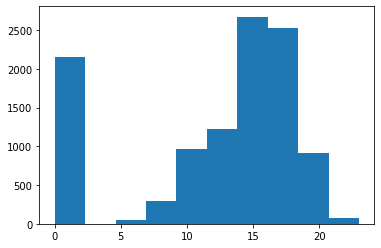

In [72]:
plt.hist(geoHPSAs['HPSA Score'])

In [83]:
#Turning the Geo ID into a number
popHPSAs['HPSA Geography Identification Number']= popHPSAs['HPSA Geography Identification Number'].astype(int)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
#Population summary stats
popHPSAs.describe()

,HPSA Score,HPSA Geography Identification Number,HPSA FTE,HPSA Designation Population,% of Population Below 100% Poverty,Longitude,Latitude,Common Postal Code,Common State FIPS Code,Discipline Class Number,HPSA Estimated Served Population,HPSA Estimated Underserved Population,HPSA Resident Civilian Population,HPSA Shortage,Primary State FIPS Code,State FIPS Code,Unnamed: 65
count,10573.000000,1.057300e+04,10111.000000,1.057300e+04,9352.000000,0.0,0.0,0.0,10573.000000,10573.0,9372.000000,9372.000000,1.318000e+03,10015.000000,10573.000000,10573.000000,0.0
mean,14.118415,2.176077e+10,1.368780,1.119659e+05,21.552588,NaN,NaN,NaN,25.672089,7.0,27198.151622,97006.153329,1.275599e+05,6.593054,25.672089,25.672089,NaN
std,5.511963,1.617178e+10,1.897032,9.576396e+04,9.056652,NaN,NaN,NaN,15.501407,0.0,36949.520135,79042.802717,1.499255e+05,5.641976,15.501407,15.501407,NaN
min,0.000000,1.001000e+03,0.000000,0.000000e+00,0.000000,NaN,NaN,NaN,1.000000,7.0,0.000000,-120741.000000,0.000000e+00,-0.250000,1.000000,1.000000,NaN
25%,13.000000,6.067007e+09,0.143800,4.146700e+04,15.600000,NaN,NaN,NaN,12.000000,7.0,2400.000000,39452.000000,0.000000e+00,2.659900,12.000000,12.000000,NaN
50%,16.000000,1.703184e+10,0.585000,7.939300e+04,19.400000,NaN,NaN,NaN,26.000000,7.0,11119.000000,72454.000000,4.926600e+04,4.670000,26.000000,26.000000,NaN
75%,17.000000,3.604709e+10,2.170000,1.657500e+05,26.000000,NaN,NaN,NaN,36.000000,7.0,44000.000000,137046.000000,2.031990e+05,9.510000,36.000000,36.000000,NaN
max,21.000000,5.306301e+10,36.700600,1.668717e+06,52.900000,NaN,NaN,NaN,78.000000,7.0,734012.000000,934705.000000,1.153795e+06,74.549400,78.000000,78.000000,NaN


(array([1.158e+03, 1.000e+00, 2.500e+01, 1.010e+02, 1.590e+02, 9.870e+02,
        8.270e+02, 2.632e+03, 3.659e+03, 1.024e+03]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <a list of 10 Patch objects>)

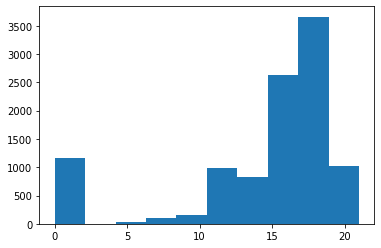

In [74]:
plt.hist(popHPSAs['HPSA Score'])

In [75]:
#Facility summary stats
facilityHPSAs.describe()

,HPSA Score,HPSA FTE,HPSA Designation Population,% of Population Below 100% Poverty,Longitude,Latitude,Common Postal Code,Common State FIPS Code,Discipline Class Number,HPSA Estimated Served Population,HPSA Estimated Underserved Population,HPSA Resident Civilian Population,HPSA Shortage,Primary State FIPS Code,State FIPS Code,Unnamed: 65
count,6403.000000,1077.000000,5.144000e+03,0.0,6403.000000,6403.000000,6149.000000,6403.000000,6403.0,0.0,0.0,0.0,1161.000000,6403.000000,6403.000000,0.0
mean,14.816805,1.446973,8.203457e+04,NaN,-97.443685,39.459821,60095.553261,27.225675,7.0,NaN,NaN,NaN,0.940026,27.225675,27.225675,NaN
std,5.874908,4.976276,2.025643e+05,NaN,22.836230,7.403072,28130.438774,16.496688,0.0,NaN,NaN,NaN,1.985742,16.496688,16.496688,NaN
min,0.000000,0.000000,1.900000e+01,NaN,-176.657570,-14.319000,617.000000,1.000000,7.0,NaN,NaN,NaN,-8.660000,1.000000,1.000000,NaN
25%,12.000000,0.000000,7.950750e+03,NaN,-110.796567,35.060558,38585.000000,13.000000,7.0,NaN,NaN,NaN,0.000000,13.000000,13.000000,NaN
50%,17.000000,0.180000,3.360400e+04,NaN,-93.231199,39.069776,62848.000000,27.000000,7.0,NaN,NaN,NaN,0.410000,27.000000,27.000000,NaN
75%,19.000000,1.000000,8.902425e+04,NaN,-83.623423,42.979860,85132.000000,40.000000,7.0,NaN,NaN,NaN,0.960000,40.000000,40.000000,NaN
max,25.000000,92.000000,4.401127e+06,NaN,166.412000,71.298967,99950.000000,78.000000,7.0,NaN,NaN,NaN,22.000000,78.000000,78.000000,NaN


(array([ 522.,   70.,  201.,  160.,  680.,  485., 1932., 1215., 1026.,
         112.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <a list of 10 Patch objects>)

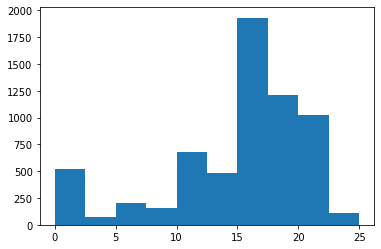

In [76]:
plt.hist(facilityHPSAs['HPSA Score'])

## Answering specific questions
### Where are the new geographic and population HPSAs located?
Using pandemic timeframe on date designated an HPSA: March 1, 2020 onward

#### Geographic

In [85]:
newGeoHPSAs = geoHPSAs[geoHPSAs['HPSA Designation Date']>np.datetime64('2020-03-01')]
newGeoHPSAs.sort_values(by='HPSA Designation Date', ascending=False)

,HPSA Name,HPSA ID,Designation Type,HPSA Discipline Class,HPSA Score,Primary State Abbreviation,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date,Metropolitan Indicator,HPSA Geography Identification Number,HPSA Degree of Shortage,Withdrawn Date,HPSA FTE,HPSA Designation Population,% of Population Below 100% Poverty,HPSA Formal Ratio,HPSA Population Type,Primary HHS Region Name,Rural Status,Longitude,Latitude,BHCMIS Organization Identification Number,Break in Designation,Common County Name,Common Postal Code,Common Region Name,Common State Abbreviation,Common State County FIPS Code,Common State FIPS Code,Common State Name,County Equivalent Name,County or County Equivalent Federal Information Processing Standard Code,Discipline Class Number,HPSA Address,HPSA City,HPSA Component Name,HPSA Component Source Identification Number,HPSA Component State Abbreviation,HPSA Component Type Code,HPSA Component Type Description,HPSA Designation Population Type Description,HPSA Estimated Served Population,HPSA Estimated Underserved Population,HPSA Metropolitan Indicator Code,HPSA Population Type Code,HPSA Postal Code,HPSA Provider Ratio Goal,HPSA Resident Civilian Population,HPSA Shortage,HPSA Status Code,HPSA Type Code,HPSA Withdrawn Date String,Primary State FIPS Code,Primary State Name,Provider Type,Rural Status Code,State Abbreviation,State and County Federal Information Processing Standard Code,State FIPS Code,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator,Data Warehouse Record Create Date,Data Warehouse Record Create Date Text,Unnamed: 65
12819,Pike/Scott Counties,7178077691,Geographic HPSA,Mental Health,16,IL,Designated,2021-10-15,10/15/2021,Unknown,17149,Not applicable,NaT,0.000,20127.0,13.6,NaN,Geographic Population,Region 5,Rural,NaN,NaN,NaN,N,"Pike County, IL",NaN,Region 5,IL,17149,17,Illinois,Pike,149,7,NaN,NaN,Pike,NaN,IL,SCTY,Single County,Geographic Population,0.0,20127.0,0,TRC,NaN,30000:1,NaN,1.010,D,Hpsa Geo,NaN,17,Illinois,Psychiatrist,R,IL,17149,17,Illinois,N,N,10/18/2021,2021/10/18,NaN
12820,Pike/Scott Counties,7178077691,Geographic HPSA,Mental Health,16,IL,Designated,2021-10-15,10/15/2021,Unknown,17171,Not applicable,NaT,0.000,20127.0,13.6,NaN,Geographic Population,Region 5,Rural,NaN,NaN,NaN,N,"Scott County, IL",NaN,Region 5,IL,17171,17,Illinois,Scott,171,7,NaN,NaN,Scott,NaN,IL,SCTY,Single County,Geographic Population,0.0,20127.0,0,TRC,NaN,30000:1,NaN,1.010,D,Hpsa Geo,NaN,17,Illinois,Psychiatrist,R,IL,17171,17,Illinois,N,N,10/18/2021,2021/10/18,NaN
4022,Behavior Management Systems MHCA,7463269070,High Needs Geographic HPSA,Mental Health,17,SD,Designated,2021-10-12,10/12/2021,Unknown,46019,Not applicable,NaT,4.775,205989.0,15.6,43139:1,Geographic Population,Region 8,Rural,NaN,NaN,NaN,N,"Butte County, SD",NaN,Region 8,SD,46019,46,South Dakota,Butte,019,7,NaN,NaN,Butte,NaN,SD,SCTY,Single County,Geographic Population,95500.0,110489.0,0,TRC,NaN,20000:1,NaN,8.955,D,Hpsa Geo HN,NaN,46,South Dakota,Psychiatrist,R,SD,46019,46,South Dakota,N,N,10/18/2021,2021/10/18,NaN
4026,Behavior Management Systems MHCA,7463269070,High Needs Geographic HPSA,Mental Health,17,SD,Designated,2021-10-12,10/12/2021,Unknown,46071,Not applicable,NaT,4.775,205989.0,15.6,43139:1,Geographic Population,Region 8,Rural,NaN,NaN,NaN,N,"Jackson County, SD",NaN,Region 8,SD,46071,46,South Dakota,Jackson,071,7,NaN,NaN,Jackson,NaN,SD,SCTY,Single County,Geographic Population,95500.0,110489.0,0,TRC,NaN,20000:1,NaN,8.955,D,Hpsa Geo HN,NaN,46,South Dakota,Psychiatrist,R,SD,46071,46,South Dakota,N,N,10/18/2021,2021/10/18,NaN
4018,Behavior Management Systems MHCA,7463269070,High Needs Geographic HPSA,Mental Health,17,SD,Designated,2021-10-12,10/12/2021,Unknown,46093,Not applicable,NaT,4.775,205989.0,15.6,43139:1,Geographic Population,Region 8,Partially Rural,NaN,NaN,NaN,N,"Meade County, SD",NaN,Region 8,SD,46093,46,South Dakota,Meade,093,7,NaN,NaN,Meade,NaN,SD,SCTY,Single County,Geographic Population,95500.0

There's an interesting pattern in the designations: most seem to have been designated at the beginning of the pandemic and very recently, aside from a peak between November and December 2020. This seems like it may be roughly aligns with covid waves.

(array([737485., 737546., 737607., 737669., 737730., 737791., 737850.,
        737911., 737972., 738034., 738095.]),
 <a list of 11 Text xticklabel objects>)

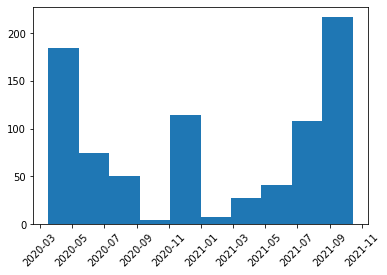

In [91]:
plt.hist(newGeoHPSAs['HPSA Designation Date'])
plt.xticks(rotation=45)

Now lets see which states acquired the most mental health HPSAs over the pandemic

In [96]:
newGeoHPSAs.groupby('Primary State Abbreviation')['HPSA Geography Identification Number'].count().sort_values(ascending=False)

Primary State Abbreviation
CA    327
IL    126
TX     63
KY     54
IA     51
MD     39
VA     31
MS     20
CO     17
ID     15
ME     14
SD     14
OR     13
MN     10
FL      8
AR      6
MT      6
OH      5
IN      4
NC      3
MI      1
GA      1
WV      1
Name: HPSA Geography Identification Number, dtype: int64

Looking at state location after removing duplicates IDs with varying census tracts

In [98]:
newGeoHPSAsDeDuped = newGeoHPSAs.drop_duplicates(subset='HPSA ID')

In [99]:
newGeoHPSAsDeDuped.groupby('Primary State Abbreviation')['HPSA Geography Identification Number'].count().sort_values(ascending=False)

Primary State Abbreviation
TX    25
IL    19
CA    18
KY    16
IA     7
MT     6
VA     5
CO     4
FL     4
MD     4
SD     3
OR     3
NC     3
MS     2
ID     2
GA     1
WV     1
ME     1
IN     1
MI     1
MN     1
OH     1
AR     1
Name: HPSA Geography Identification Number, dtype: int64

Looking at underserved population rather than number of HPSAs, Illinois comes out on top. Illinois also had the highest shortage of mental health professionals according to one report.

In [101]:
newGeoHPSAsDeDuped.groupby('Primary State Abbreviation')['HPSA Estimated Underserved Population'].sum().sort_values(ascending=False)

Primary State Abbreviation
IL    2197712.0
CA    1315680.0
TX     770397.0
KY     574844.0
VA     352963.0
IA     344795.0
CO     284358.0
MS     210731.0
MD     188606.0
FL     186538.0
OR     180014.0
IN     159813.0
SD     155589.0
ID     130685.0
NC     130213.0
MN      90336.0
GA      81635.0
OH      63837.0
AR      61863.0
MT      57804.0
ME      29219.0
MI      28540.0
WV      20058.0
Name: HPSA Estimated Underserved Population, dtype: float64

How does this compare to all hpsas?

In [102]:
geoHPSAsDeDuped = geoHPSAs.drop_duplicates(subset='HPSA ID')
geoHPSAsDeDuped.groupby('Primary State Abbreviation')['HPSA Estimated Underserved Population'].sum().sort_values(ascending=False)

Primary State Abbreviation
AZ    6512703.0
CA    6405309.0
IL    5071905.0
TX    4717085.0
WA    2775063.0
IN    2341233.0
MS    2039681.0
KY    1993676.0
GA    1900146.0
TN    1600487.0
MI    1583574.0
FL    1522308.0
LA    1498250.0
OH    1483714.0
CO    1234316.0
WI    1206900.0
VA    1185975.0
MN    1183783.0
NC    1144396.0
CT    1128733.0
MO    1083795.0
NV    1037720.0
AL    1030313.0
IA    1026983.0
NM     996462.0
UT     960039.0
ID     844161.0
WV     824814.0
AR     706368.0
SC     696075.0
OR     684040.0
PA     677780.0
SD     651452.0
KS     599032.0
OK     595142.0
MD     583895.0
MT     356009.0
WY     350085.0
NE     283348.0
ME     249481.0
AK     200379.0
ND     175244.0
MH     153158.0
DC     126835.0
FM     100997.0
MA      67836.0
AS      55009.0
MP      53890.0
VI      43031.0
PW      39814.0
NH      27975.0
GU      18358.0
RI      14721.0
PR       9162.0
NJ          0.0
DE          0.0
VT          0.0
HI    -124112.0
NY   -1543156.0
Name: HPSA Estimated Underser

Does filtering out withdrawn HPSAs change the results? It seems so only for the overall, rather than the recent pandemci picture

In [104]:
newGeoHPSAsDeDuped[newGeoHPSAsDeDuped['HPSA Status']=='Designated'].groupby('Primary State Abbreviation')['HPSA Estimated Underserved Population'].sum().sort_values(ascending=False)

Primary State Abbreviation
IL    2197712.0
CA     977516.0
TX     689868.0
VA     352963.0
IA     305040.0
CO     284358.0
KY     265628.0
MS     210731.0
FL     186538.0
MD     166270.0
IN     159813.0
ID     130685.0
NC     130213.0
SD     110489.0
OR     107021.0
MN      90336.0
GA      81635.0
OH      63837.0
AR      61863.0
MT      57804.0
ME      29219.0
MI      28540.0
WV      20058.0
Name: HPSA Estimated Underserved Population, dtype: float64

In [105]:
geoHPSAsDeDuped[geoHPSAsDeDuped['HPSA Status']=='Designated'].groupby('Primary State Abbreviation')['HPSA Estimated Underserved Population'].sum().sort_values(ascending=False)

Primary State Abbreviation
TX    3988115.0
CA    3031781.0
IL    2702039.0
WA    2057333.0
CO    1042371.0
OH    1003013.0
GA     932746.0
MS     880947.0
AZ     866441.0
MN     842894.0
NC     703040.0
FL     696594.0
LA     610043.0
MI     572066.0
UT     510590.0
KY     484092.0
MD     461818.0
VA     454259.0
ID     434048.0
IA     407100.0
NM     400743.0
SC     398581.0
SD     363123.0
OK     355949.0
MT     309601.0
OR     305447.0
NV     268832.0
NE     234453.0
ND     231680.0
WY     210981.0
AK     197227.0
HI     189602.0
WV     179414.0
IN     174010.0
AR     167585.0
MH     153158.0
ME     147305.0
PA     137733.0
KS     131701.0
NY     115082.0
FM     100997.0
AS      55009.0
MP      53890.0
VI      38672.0
WI      35024.0
PW      19907.0
PR       9162.0
Name: HPSA Estimated Underserved Population, dtype: float64

(array([ 58.,   7.,  27., 188., 144., 135., 168.,  62.,  24.,  16.]),
 array([ 6. ,  7.6,  9.2, 10.8, 12.4, 14. , 15.6, 17.2, 18.8, 20.4, 22. ]),
 <a list of 10 Patch objects>)

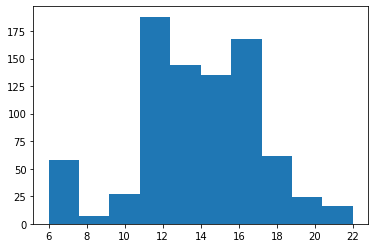

In [116]:
plt.hist(newGeoHPSAs['HPSA Score'])

#### Population

In [106]:
newPopHPSAs = popHPSAs[popHPSAs['HPSA Designation Date']>np.datetime64('2020-03-01')]
newPopHPSAs.sort_values(by='HPSA Designation Date', ascending=False)

,HPSA Name,HPSA ID,Designation Type,HPSA Discipline Class,HPSA Score,Primary State Abbreviation,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date,Metropolitan Indicator,HPSA Geography Identification Number,HPSA Degree of Shortage,Withdrawn Date,HPSA FTE,HPSA Designation Population,% of Population Below 100% Poverty,HPSA Formal Ratio,HPSA Population Type,Primary HHS Region Name,Rural Status,Longitude,Latitude,BHCMIS Organization Identification Number,Break in Designation,Common County Name,Common Postal Code,Common Region Name,Common State Abbreviation,Common State County FIPS Code,Common State FIPS Code,Common State Name,County Equivalent Name,County or County Equivalent Federal Information Processing Standard Code,Discipline Class Number,HPSA Address,HPSA City,HPSA Component Name,HPSA Component Source Identification Number,HPSA Component State Abbreviation,HPSA Component Type Code,HPSA Component Type Description,HPSA Designation Population Type Description,HPSA Estimated Served Population,HPSA Estimated Underserved Population,HPSA Metropolitan Indicator Code,HPSA Population Type Code,HPSA Postal Code,HPSA Provider Ratio Goal,HPSA Resident Civilian Population,HPSA Shortage,HPSA Status Code,HPSA Type Code,HPSA Withdrawn Date String,Primary State FIPS Code,Primary State Name,Provider Type,Rural Status Code,State Abbreviation,State and County Federal Information Processing Standard Code,State FIPS Code,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator,Data Warehouse Record Create Date,Data Warehouse Record Create Date Text,Unnamed: 65
5284,LI - Holyoke/Chicopee,7252763379,HPSA Population,Mental Health,20,MA,Designated,2021-10-12,10/12/2021,Unknown,2501313660,Not applicable,NaT,0.6226,37534.0,20.3,60286:1,Low Income Population HPSA,Region 1,Non-Rural,NaN,NaN,NaN,N,"Hampden County, MA",NaN,Region 1,MA,25013,25,Massachusetts,Hampden,013,7,NaN,NaN,"Chicopee city, Hampden County, Massachusetts",NaN,MA,CSD,County Subdivision,Low Income Population HPSA,12452.0,25082.0,0,LI,NaN,20000:1,NaN,1.8774,D,Hpsa Pop,NaN,25,Massachusetts,Psychiatrist,N,MA,25013,25,Massachusetts,N,N,10/18/2021,2021/10/18,NaN
5285,LI - Holyoke/Chicopee,7252763379,HPSA Population,Mental Health,20,MA,Designated,2021-10-12,10/12/2021,Unknown,2501330840,Not applicable,NaT,0.6226,37534.0,20.3,60286:1,Low Income Population HPSA,Region 1,Non-Rural,NaN,NaN,NaN,N,"Hampden County, MA",NaN,Region 1,MA,25013,25,Massachusetts,Hampden,013,7,NaN,NaN,"Holyoke city, Hampden County, Massachusetts",NaN,MA,CSD,County Subdivision,Low Income Population HPSA,12452.0,25082.0,0,LI,NaN,20000:1,NaN,1.8774,D,Hpsa Pop,NaN,25,Massachusetts,Psychiatrist,N,MA,25013,25,Massachusetts,N,N,10/18/2021,2021/10/18,NaN
7823,LI - Central Davie County,7378352721,HPSA Population,Mental Health,16,NC,Designated,2021-10-12,10/12/2021,Unknown,3705991660,Not applicable,NaT,0.0000,7653.0,18.1,NaN,Low Income Population HPSA,Region 4,Rural,NaN,NaN,NaN,N,"Davie County, NC",NaN,Region 4,NC,37059,37,North Carolina,Davie,059,7,NaN,NaN,"Jerusalem township, Davie County, North Carolina",NaN,NC,CSD,County Subdivision,Low Income Population HPSA,0.0,7653.0,0,LI,NaN,20000:1,NaN,0.5100,D,Hpsa Pop,NaN,37,North Carolina,Psychiatrist,R,NC,37059,37,North Carolina,N,N,10/18/2021,2021/10/18,NaN
7822,LI - Central Davie County,7378352721,HPSA Population,Mental Health,16,NC,Designated,2021-10-12,10/12/2021,Unknown,3705990668,Not applicable,NaT,0.0000,7653.0,18.1,NaN,Low Income Population HPSA,Region 4,Non-Rural,NaN,NaN,NaN,N,"Davie County, NC",NaN,Region 4,NC,37059,37,North Carolina,Davie,059,7,NaN,NaN,"Clarksville township, Davie County, North Caro...",NaN,NC,CSD,County Subdivision,Low Income Population HPSA,0.0,7653.0,0,LI,NaN,20000:1,NaN,0.5100,D,Hpsa Pop,NaN,37,North Carolina,Psychiatrist,N,NC,37059,37,North Carolina,N,N,10/18/2021,2021/10/18,NaN
7821,LI - Central Davie County,7378352721,HPSA Population,Mental Health,16,NC,Designated,2021-10-12,10/12/2021,Unknown,3705992

The population HPSA designation distribution is much different than the geo one, but there's still a lot of recent activity

(array([737485., 737546., 737607., 737669., 737730., 737791., 737850.,
        737911., 737972., 738034., 738095.]),
 <a list of 11 Text xticklabel objects>)

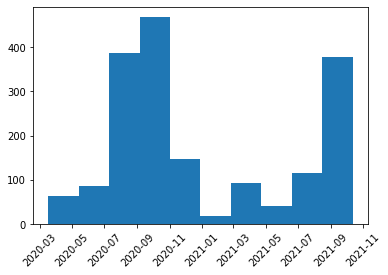

In [108]:
plt.hist(newPopHPSAs['HPSA Designation Date'])
plt.xticks(rotation=45)

In [114]:
newPopHPSAs[newPopHPSAs['HPSA Status']=='Designated'].sort_values('HPSA Estimated Underserved Population', ascending=False)

,HPSA Name,HPSA ID,Designation Type,HPSA Discipline Class,HPSA Score,Primary State Abbreviation,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date,Metropolitan Indicator,HPSA Geography Identification Number,HPSA Degree of Shortage,Withdrawn Date,HPSA FTE,HPSA Designation Population,% of Population Below 100% Poverty,HPSA Formal Ratio,HPSA Population Type,Primary HHS Region Name,Rural Status,Longitude,Latitude,BHCMIS Organization Identification Number,Break in Designation,Common County Name,Common Postal Code,Common Region Name,Common State Abbreviation,Common State County FIPS Code,Common State FIPS Code,Common State Name,County Equivalent Name,County or County Equivalent Federal Information Processing Standard Code,Discipline Class Number,HPSA Address,HPSA City,HPSA Component Name,HPSA Component Source Identification Number,HPSA Component State Abbreviation,HPSA Component Type Code,HPSA Component Type Description,HPSA Designation Population Type Description,HPSA Estimated Served Population,HPSA Estimated Underserved Population,HPSA Metropolitan Indicator Code,HPSA Population Type Code,HPSA Postal Code,HPSA Provider Ratio Goal,HPSA Resident Civilian Population,HPSA Shortage,HPSA Status Code,HPSA Type Code,HPSA Withdrawn Date String,Primary State FIPS Code,Primary State Name,Provider Type,Rural Status Code,State Abbreviation,State and County Federal Information Processing Standard Code,State FIPS Code,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator,Data Warehouse Record Create Date,Data Warehouse Record Create Date Text,Unnamed: 65
14316,LI - Bexar County,7485905426,HPSA Population,Mental Health,18,TX,Designated,2021-04-26,04/26/2021,Unknown,48029,Not applicable,NaT,8.5439,698449.0,15.7,81748:1,Low Income Population HPSA,Region 6,Non-Rural,NaN,NaN,NaN,N,"Bexar County, TX",NaN,Region 6,TX,48029,48,Texas,Bexar,029,7,NaN,NaN,Bexar,NaN,TX,SCTY,Single County,Low Income Population HPSA,170878.0,527571.0,0,LI,NaN,20000:1,NaN,38.0161,D,Hpsa Pop,NaN,48,Texas,Psychiatrist,N,TX,48029,48,Texas,N,N,10/18/2021,2021/10/18,NaN
22910,LI - Bluegrass MHCA,7218340137,HPSA Population,Mental Health,18,KY,Designated,2020-05-26,09/10/2021,Unknown,21073,Not applicable,NaT,0.0000,270055.0,16.5,NaN,Low Income Population HPSA,Region 4,Rural,NaN,NaN,NaN,N,"Franklin County, KY",NaN,Region 4,KY,21073,21,Kentucky,Franklin,073,7,NaN,NaN,Franklin,NaN,KY,SCTY,Single County,Low Income Population HPSA,0.0,270055.0,0,LI,NaN,20000:1,NaN,18.0000,D,Hpsa Pop,NaN,21,Kentucky,Psychiatrist,R,KY,21073,21,Kentucky,N,N,10/18/2021,2021/10/18,NaN
22905,LI - Bluegrass MHCA,7218340137,HPSA Population,Mental Health,18,KY,Designated,2020-05-26,09/10/2021,Unknown,21049,Not applicable,NaT,0.0000,270055.0,16.5,NaN,Low Income Population HPSA,Region 4,Partially Rural,NaN,NaN,NaN,N,"Clark County, KY",NaN,Region 4,KY,21049,21,Kentucky,Clark,049,7,NaN,NaN,Clark,NaN,KY,SCTY,Single County,Low Income Population HPSA,0.0,270055.0,0,LI,NaN,20000:1,NaN,18.0000,D,Hpsa Pop,NaN,21,Kentucky,Psychiatrist,P,KY,21049,21,Kentucky,N,N,10/18/2021,2021/10/18,NaN
22911,LI - Bluegrass MHCA,7218340137,HPSA Population,Mental Health,18,KY,Designated,2020-05-26,09/10/2021,Unknown,21113,Not applicable,NaT,0.0000,270055.0,16.5,NaN,Low Income Population HPSA,Region 4,Partially Rural,NaN,NaN,NaN,N,"Jessamine County, KY",NaN,Region 4,KY,21113,21,Kentucky,Jessamine,113,7,NaN,NaN,Jessamine,NaN,KY,SCTY,Single County,Low Income Population HPSA,0.0,270055.0,0,LI,NaN,20000:1,NaN,18.0000,D,Hpsa Pop,NaN,21,Kentucky,Psychiatrist,P,KY,21113,21,Kentucky,N,N,10/18/2021,2021/10/18,NaN
22914,LI - Bluegrass MHCA,7218340137,HPSA Population,Mental Health,18,KY,Designated,2020-05-26,09/10/2021,Unknown,21097,Not applicable,NaT,0.0000,270055.0,16.5,NaN,Low Income Population HPSA,Region 4,Rural,NaN,NaN,NaN,N,"Harrison County, KY",NaN,Region 4,KY,21097,21,Kentucky,Harrison,097,7,NaN,NaN,Harrison,NaN,KY,SCTY,Single County,Low Income Population HPSA,0.0,270055.0,0,LI,NaN,20000:

(array([  2.,   0., 114.,  99.,  43., 149., 883., 363., 117.,  25.]),
 array([ 8. ,  9.3, 10.6, 11.9, 13.2, 14.5, 15.8, 17.1, 18.4, 19.7, 21. ]),
 <a list of 10 Patch objects>)

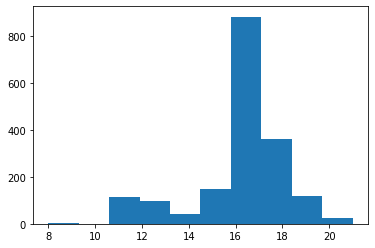

In [115]:
plt.hist(newPopHPSAs['HPSA Score'])

#### Observations and questions
Illinois has the largest underserved pop under a new geo HPSA - why is there an increase there?  
Why are most new HPSAs designated at the beginning and end of the pandemic?  
The low-income population of Bexar County, Texas is the largest HPSA population underserved population   
There are many more new population HPSAs than geo HPSAs

### Where are the most longstanding geographic and population HPSAs located?

In [155]:
geoHPSAs['HPSA Duration'] = geoHPSAs['Withdrawn Date'] - geoHPSAs['HPSA Designation Date']
popHPSAs['HPSA Duration'] = popHPSAs['Withdrawn Date'] - popHPSAs['HPSA Designation Date']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [134]:
geoHPSAs['HPSA Duration'].describe()

count                         4746
mean     4311 days 17:33:08.874852
std      3453 days 02:20:26.641292
min                0 days 00:00:00
25%             1877 days 00:00:00
50%             3114 days 00:00:00
75%             5240 days 00:00:00
max            15694 days 00:00:00
Name: HPSA Duration, dtype: object

In [137]:
geoHPSAs.drop_duplicates(subset='HPSA ID')['HPSA Duration'].describe()

count                          815
mean     5406 days 16:18:50.797545
std      3823 days 02:17:46.537806
min                0 days 00:00:00
25%             2373 days 12:00:00
50%             4172 days 00:00:00
75%             7388 days 00:00:00
max            15694 days 00:00:00
Name: HPSA Duration, dtype: object

Looking at the HPSAs that were designated for the longest among those currently withdrawn

In [141]:
geoHPSAs.drop_duplicates(subset='HPSA ID').sort_values(by='HPSA Duration', ascending=False)

,HPSA Name,HPSA ID,Designation Type,HPSA Discipline Class,HPSA Score,Primary State Abbreviation,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date,Metropolitan Indicator,HPSA Geography Identification Number,HPSA Degree of Shortage,Withdrawn Date,HPSA FTE,HPSA Designation Population,% of Population Below 100% Poverty,HPSA Formal Ratio,HPSA Population Type,Primary HHS Region Name,Rural Status,Longitude,Latitude,BHCMIS Organization Identification Number,Break in Designation,Common County Name,Common Postal Code,Common Region Name,Common State Abbreviation,Common State County FIPS Code,Common State FIPS Code,Common State Name,County Equivalent Name,County or County Equivalent Federal Information Processing Standard Code,Discipline Class Number,HPSA Address,HPSA City,HPSA Component Name,HPSA Component Source Identification Number,HPSA Component State Abbreviation,HPSA Component Type Code,HPSA Component Type Description,HPSA Designation Population Type Description,HPSA Estimated Served Population,HPSA Estimated Underserved Population,HPSA Metropolitan Indicator Code,HPSA Population Type Code,HPSA Postal Code,HPSA Provider Ratio Goal,HPSA Resident Civilian Population,HPSA Shortage,HPSA Status Code,HPSA Type Code,HPSA Withdrawn Date String,Primary State FIPS Code,Primary State Name,Provider Type,Rural Status Code,State Abbreviation,State and County Federal Information Processing Standard Code,State FIPS Code,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator,Data Warehouse Record Create Date,Data Warehouse Record Create Date Text,Unnamed: 65,HPSA Duration
20750,Texarkana Catchment Area,7051009930,Geographic HPSA,Mental Health,18,AR,Withdrawn,1978-07-19,07/07/2021,Unknown,5061,Not applicable,2021-07-07,2.00,114634.0,21.7,57317:1,Geographic Population,Region 6,Rural,NaN,NaN,NaN,N,"Howard County, AR",NaN,Region 6,AR,05061,5,Arkansas,Howard,061,7,NaN,NaN,Howard,NaN,AR,SCTY,Single County,Geographic Population,60000.0,54634.0,0,TRC,NaN,30000:1,NaN,3.73,W,Hpsa Geo,2021/07/07,5,Arkansas,Psychiatrist,R,AR,05061,5,Arkansas,N,N,10/18/2021,2021/10/18,NaN,15694 days
21443,MHCA 9,7476533478,High Needs Geographic HPSA,Mental Health,18,TN,Withdrawn,1978-08-02,06/15/2020,Unknown,47049,Not applicable,2020-06-15,2.19,333365.0,21.1,152221:1,Geographic Population,Region 4,Rural,NaN,NaN,NaN,N,"Fentress County, TN",NaN,Region 4,TN,47049,47,Tennessee,Fentress,049,7,NaN,NaN,Fentress,NaN,TN,SCTY,Single County,Geographic Population,9855.0,323510.0,0,TRC,NaN,4500:1,NaN,71.89,W,Hpsa Geo HN,2020/06/15,47,Tennessee,Psychiatrist / Core Mental Health,R,TN,47049,47,Tennessee,N,N,10/18/2021,2021/10/18,NaN,15293 days
3611,Crossroads Service Area,7519581177,High Needs Geographic HPSA,Mental Health,15,VA,Withdrawn,1978-08-30,06/15/2020,Unknown,51111,Not applicable,2020-06-15,0.80,93480.0,19.2,116850:1,Geographic Population,Region 3,Rural,NaN,NaN,NaN,N,"Lunenburg County, VA",NaN,Region 3,VA,51111,51,Virginia,Lunenburg,111,7,NaN,NaN,Lunenburg,NaN,VA,SCTY,Single County,Geographic Population,16000.0,77480.0,0,TRC,NaN,20000:1,NaN,5.43,W,Hpsa Geo HN,2020/06/15,51,Virginia,Psychiatrist,R,VA,51111,51,Virginia,N,N,10/18/2021,2021/10/18,NaN,15265 days
3652,Cumberland Mountain Service Area,7517586098,High Needs Geographic HPSA,Mental Health,18,VA,Withdrawn,1978-09-27,06/15/2020,Unknown,51167,Not applicable,2020-06-15,2.05,108928.0,20.3,53136:1,Geographic Population,Region 3,Rural,NaN,NaN,NaN,N,"Russell County, VA",NaN,Region 3,VA,51167,51,Virginia,Russell,167,7,NaN,NaN,Russell,NaN,VA,SCTY,Single County,Geographic Population,41000.0,67928.0,0,TRC,NaN,20000:1,NaN,5.21,W,Hpsa Geo HN,2020/06/15,51,Virginia,Psychiatrist,R,VA,51167,51,Virginia,N,N,10/18/2021,2021/10/18,NaN,15237 days
22967,Upper Kentucky River,7216705857,High Needs Geographic HPSA,Mental Health,13,KY,Withdrawn,1979-09-05,06/15/2020,Unknown,21193,Not applicable,2020-06-15,3.59,109137.0,28.5,30400:1,Geographic Population,Region 4,Rural,NaN,NaN,NaN,N,"Perry County, 

Compared with the most longstanding HPSAs that are still designated

In [156]:
geoHPSAs[geoHPSAs['HPSA Status']=='Designated'].drop_duplicates(subset='HPSA ID').sort_values(by='HPSA Designation Date', ascending=True).head(50)

,HPSA Name,HPSA ID,Designation Type,HPSA Discipline Class,HPSA Score,Primary State Abbreviation,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date,Metropolitan Indicator,HPSA Geography Identification Number,HPSA Degree of Shortage,Withdrawn Date,HPSA FTE,HPSA Designation Population,% of Population Below 100% Poverty,HPSA Formal Ratio,HPSA Population Type,Primary HHS Region Name,Rural Status,Longitude,Latitude,BHCMIS Organization Identification Number,Break in Designation,Common County Name,Common Postal Code,Common Region Name,Common State Abbreviation,Common State County FIPS Code,Common State FIPS Code,Common State Name,County Equivalent Name,County or County Equivalent Federal Information Processing Standard Code,Discipline Class Number,HPSA Address,HPSA City,HPSA Component Name,HPSA Component Source Identification Number,HPSA Component State Abbreviation,HPSA Component Type Code,HPSA Component Type Description,HPSA Designation Population Type Description,HPSA Estimated Served Population,HPSA Estimated Underserved Population,HPSA Metropolitan Indicator Code,HPSA Population Type Code,HPSA Postal Code,HPSA Provider Ratio Goal,HPSA Resident Civilian Population,HPSA Shortage,HPSA Status Code,HPSA Type Code,HPSA Withdrawn Date String,Primary State FIPS Code,Primary State Name,Provider Type,Rural Status Code,State Abbreviation,State and County Federal Information Processing Standard Code,State FIPS Code,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator,Data Warehouse Record Create Date,Data Warehouse Record Create Date Text,Unnamed: 65,HPSA Duration
24504,Grant County,7532307915,Geographic HPSA,Mental Health,16,WA,Designated,1978-05-20,08/06/2021,Unknown,53025,Not applicable,NaT,0.525,94542.0,14.8,180080:1,Geographic Population,Region 10,Rural,NaN,NaN,NaN,N,"Grant County, WA",NaN,Region 10,WA,53025,53,Washington,Grant,025,7,NaN,NaN,Grant,NaN,WA,SCTY,Single County,Geographic Population,15750.0,78792.0,0,TRC,NaN,30000:1,NaN,4.205,D,Hpsa Geo,NaN,53,Washington,Psychiatrist,R,WA,53025,53,Washington,N,N,10/18/2021,2021/10/18,NaN,NaT
20713,Pine Bluff MHCA,7054123179,High Needs Geographic HPSA,Mental Health,8,AR,Designated,1978-07-19,09/10/2021,Unknown,5053,Not applicable,NaT,3.650,114629.0,19.8,31405:1,Geographic Population,Region 6,Partially Rural,NaN,NaN,NaN,N,"Grant County, AR",NaN,Region 6,AR,05053,5,Arkansas,Grant,053,7,NaN,NaN,Grant,NaN,AR,SCTY,Single County,Geographic Population,73000.0,41629.0,0,TRC,NaN,20000:1,NaN,3.990,D,Hpsa Geo HN,NaN,5,Arkansas,Psychiatrist,P,AR,05053,5,Arkansas,N,N,10/18/2021,2021/10/18,NaN,NaT
20701,El Dorado Catchment Area,7055305173,High Needs Geographic HPSA,Mental Health,20,AR,Designated,1978-07-19,09/10/2021,Unknown,5099,Not applicable,NaT,2.000,104093.0,21.0,52047:1,Geographic Population,Region 6,Rural,NaN,NaN,NaN,N,"Nevada County, AR",NaN,Region 6,AR,05099,5,Arkansas,Nevada,099,7,NaN,NaN,Nevada,NaN,AR,SCTY,Single County,Geographic Population,40000.0,64093.0,0,TRC,NaN,20000:1,NaN,4.940,D,Hpsa Geo HN,NaN,5,Arkansas,Psychiatrist,R,AR,05099,5,Arkansas,N,N,10/18/2021,2021/10/18,NaN,NaT
25795,Catchment Area 1,7318003632,Geographic HPSA,Mental Health,13,NE,Designated,1978-07-21,09/10/2021,Unknown,31049,Not applicable,NaT,2.000,82118.0,12.7,41059:1,Geographic Population,Region 7,Rural,NaN,NaN,NaN,N,"Deuel County, NE",NaN,Region 7,NE,31049,31,Nebraska,Deuel,049,7,NaN,NaN,Deuel,NaN,NE,SCTY,Single County,Geographic Population,60000.0,22118.0,0,TRC,NaN,30000:1,NaN,2.110,D,Hpsa Geo,NaN,31,Nebraska,Psychiatrist,R,NE,31049,31,Nebraska,N,N,10/18/2021,2021/10/18,NaN,NaT
25814,Catchment Area 4,7315783946,Geographic HPSA,Mental Health,17,NE,Designated,1978-07-21,09/10/2021,Unknown,31139,Not applicable,NaT,1.030,199647.0,11.3,193832:1,Geographic Population,Region 7,Rural,NaN,NaN,NaN,N,"Pierce County, NE",NaN,Region 7,NE,31139,31,Nebraska,Pierce,139,7,NaN,NaN,Pierce,NaN,NE,SCTY,Single County,Geographic Population,30900.0,168747.0,0,TRC,NaN,30000:1,NaN,8.950,D

In [161]:
geoHPSAs.drop_duplicates(subset='HPSA ID').groupby('Primary State Abbreviation')['HPSA Duration'].max().sort_values(ascending=False)

Primary State Abbreviation
AR   15694 days
TN   15293 days
VA   15265 days
KY   14894 days
SC   14656 days
WA   14653 days
SD   14650 days
IA   14635 days
ND   14425 days
MS   14363 days
AZ   14326 days
MD   14307 days
OR   14266 days
CO   14176 days
MT   14064 days
MI   14050 days
IN   13993 days
WI   13787 days
WV   13605 days
IL   13028 days
FL   12761 days
PA   12366 days
VT   12321 days
OH   12299 days
NC   12263 days
NV   12104 days
MO   12088 days
GA   11668 days
TX   11612 days
NM   11277 days
PR   11038 days
GU   10977 days
NY   10415 days
CA   10241 days
AK    9945 days
LA    9669 days
WY    8804 days
NH    8794 days
MN    8790 days
HI    8121 days
OK    8120 days
AL    7712 days
KS    7581 days
ME    7233 days
UT    6747 days
NJ    6461 days
RI    5620 days
MA    5590 days
DE    5544 days
ID    5423 days
CT    5358 days
VI    3890 days
NE    2861 days
PW    2148 days
AS          NaT
DC          NaT
FM          NaT
MH          NaT
MP          NaT
Name: HPSA Duration, dtype: t

In [139]:
popHPSAs['HPSA Duration'].describe()

count                         4006
mean     2301 days 21:57:03.864201
std      1446 days 09:23:04.135029
min                2 days 00:00:00
25%             1266 days 00:00:00
50%             2093 days 00:00:00
75%             3150 days 00:00:00
max            14347 days 00:00:00
Name: HPSA Duration, dtype: object

In [138]:
popHPSAs.drop_duplicates(subset='HPSA ID')['HPSA Duration'].describe()

count                          215
mean            2537 days 09:36:00
std      1680 days 00:57:08.562979
min                2 days 00:00:00
25%             1388 days 00:00:00
50%             2149 days 00:00:00
75%             3351 days 00:00:00
max            14347 days 00:00:00
Name: HPSA Duration, dtype: object

In [158]:
popHPSAs.drop_duplicates(subset='HPSA ID').sort_values(by='HPSA Duration', ascending=False)

,HPSA Name,HPSA ID,Designation Type,HPSA Discipline Class,HPSA Score,Primary State Abbreviation,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date,Metropolitan Indicator,HPSA Geography Identification Number,HPSA Degree of Shortage,Withdrawn Date,HPSA FTE,HPSA Designation Population,% of Population Below 100% Poverty,HPSA Formal Ratio,HPSA Population Type,Primary HHS Region Name,Rural Status,Longitude,Latitude,BHCMIS Organization Identification Number,Break in Designation,Common County Name,Common Postal Code,Common Region Name,Common State Abbreviation,Common State County FIPS Code,Common State FIPS Code,Common State Name,County Equivalent Name,County or County Equivalent Federal Information Processing Standard Code,Discipline Class Number,HPSA Address,HPSA City,HPSA Component Name,HPSA Component Source Identification Number,HPSA Component State Abbreviation,HPSA Component Type Code,HPSA Component Type Description,HPSA Designation Population Type Description,HPSA Estimated Served Population,HPSA Estimated Underserved Population,HPSA Metropolitan Indicator Code,HPSA Population Type Code,HPSA Postal Code,HPSA Provider Ratio Goal,HPSA Resident Civilian Population,HPSA Shortage,HPSA Status Code,HPSA Type Code,HPSA Withdrawn Date String,Primary State FIPS Code,Primary State Name,Provider Type,Rural Status Code,State Abbreviation,State and County Federal Information Processing Standard Code,State FIPS Code,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator,Data Warehouse Record Create Date,Data Warehouse Record Create Date Text,Unnamed: 65,HPSA Duration
25062,Medicaid Eligible - Catchment Area 8,7399070070,HPSA Population,Mental Health,12,OH,Withdrawn,1980-03-14,06/25/2019,Unknown,39111,Not applicable,2019-06-25,0.2200,34867.0,15.7,158486:1,Medicaid Eligible Population HPSA,Region 5,Rural,NaN,NaN,NaN,N,"Monroe County, OH",NaN,Region 5,OH,39111,39,Ohio,Monroe,111,7,NaN,NaN,Monroe,NaN,OH,SCTY,Single County,Medicaid Eligible Population HPSA,4400.0,30467.0,0,M,NaN,20000:1,NaN,2.1000,W,Hpsa Pop,2019/06/25,39,Ohio,Psychiatrist,R,OH,39111,39,Ohio,N,N,10/18/2021,2021/10/18,NaN,14347 days
10673,Low Income - Yakima,7539995309,HPSA Population,Mental Health,0,WA,Withdrawn,1983-01-19,04/16/2008,Metropolitan,5307793344,Not applicable,2008-04-16,NaN,0.0,19.7,NaN,Low Income Population HPSA,Region 10,NaN,NaN,NaN,NaN,N,"Yakima County, WA",NaN,Region 10,WA,53077,53,Washington,Yakima,077,7,NaN,NaN,Sunnyside,NaN,WA,CSD,County Subdivision,Low Income Population HPSA,NaN,NaN,M,LI,NaN,NaN,0.0,NaN,W,Hpsa Pop,2008/04/16,53,Washington,NaN,NaN,WA,53077,53,Washington,N,N,10/18/2021,2021/10/18,NaN,9219 days
10665,Low Inome/MFW/Homeless - Cowlitz/Wahkiakum Cou...,7539995322,HPSA Population,Mental Health,15,WA,Withdrawn,2000-04-21,07/02/2018,Unknown,53015,Not applicable,2018-07-02,2.1000,42279.0,14.1,20133:1,Low Income Homeless Migrant Farmworker Populat...,Region 10,Partially Rural,NaN,NaN,NaN,N,"Cowlitz County, WA",NaN,Region 10,WA,53015,53,Washington,Cowlitz,015,7,NaN,NaN,Cowlitz,NaN,WA,SCTY,Single County,Low Income Homeless Migrant Farmworker Populat...,42000.0,279.0,0,LI-H-MFW,NaN,20000:1,104032.0,0.0100,W,Hpsa Pop,2018/07/02,53,Washington,Psychiatrist,P,WA,53015,53,Washington,N,N,10/18/2021,2021/10/18,NaN,6646 days
19340,Medicaid Eligible - West Central Baltimore City,7242486688,HPSA Population,Mental Health,15,MD,Withdrawn,2001-06-21,06/25/2019,Unknown,24510110200,Not applicable,2019-06-25,1.9200,92149.0,30.0,47994:1,Medicaid Eligible Population HPSA,Region 3,Non-Rural,NaN,NaN,NaN,N,"Baltimore City, MD",NaN,Region 3,MD,24510,24,Maryland,Baltimore City,510,7,NaN,NaN,1102,NaN,MD,CT,Census Tract,Medicaid Eligible Population HPSA,8640.0,83509.0,0,M,NaN,4500:1,NaN,18.5600,W,Hpsa Pop,2019/06/25,24,Maryland,Psychiatrist / Core Mental Health,N,MD,24510,24,Maryland,N,N,10/18/2021,2021/10/18,NaN,6578 days
10664,Low Income/Migrant Farmworker - Whatcom,7539995323,HPSA Population,Mental Health,16,WA,Withdrawn,20

In [159]:
popHPSAs[popHPSAs['HPSA Status']=='Designated'].drop_duplicates(subset='HPSA ID').sort_values(by='HPSA Designation Date', ascending=True).head(50)

,HPSA Name,HPSA ID,Designation Type,HPSA Discipline Class,HPSA Score,Primary State Abbreviation,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date,Metropolitan Indicator,HPSA Geography Identification Number,HPSA Degree of Shortage,Withdrawn Date,HPSA FTE,HPSA Designation Population,% of Population Below 100% Poverty,HPSA Formal Ratio,HPSA Population Type,Primary HHS Region Name,Rural Status,Longitude,Latitude,BHCMIS Organization Identification Number,Break in Designation,Common County Name,Common Postal Code,Common Region Name,Common State Abbreviation,Common State County FIPS Code,Common State FIPS Code,Common State Name,County Equivalent Name,County or County Equivalent Federal Information Processing Standard Code,Discipline Class Number,HPSA Address,HPSA City,HPSA Component Name,HPSA Component Source Identification Number,HPSA Component State Abbreviation,HPSA Component Type Code,HPSA Component Type Description,HPSA Designation Population Type Description,HPSA Estimated Served Population,HPSA Estimated Underserved Population,HPSA Metropolitan Indicator Code,HPSA Population Type Code,HPSA Postal Code,HPSA Provider Ratio Goal,HPSA Resident Civilian Population,HPSA Shortage,HPSA Status Code,HPSA Type Code,HPSA Withdrawn Date String,Primary State FIPS Code,Primary State Name,Provider Type,Rural Status Code,State Abbreviation,State and County Federal Information Processing Standard Code,State FIPS Code,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator,Data Warehouse Record Create Date,Data Warehouse Record Create Date Text,Unnamed: 65,HPSA Duration
11104,LI-Aiken/Barnwell Counties,7457797602,HPSA Population,Mental Health,18,SC,Designated,1997-12-11,09/10/2021,Unknown,45011,Not applicable,NaT,1.0645,72613.0,16.4,68213:1,Low Income Population HPSA,Region 4,Rural,NaN,NaN,NaN,N,"Barnwell County, SC",NaN,Region 4,SC,45011,45,South Carolina,Barnwell,011,7,NaN,NaN,Barnwell,NaN,SC,SCTY,Single County,Low Income Population HPSA,21290.0,51323.0,0,LI,NaN,20000:1,NaN,3.7755,D,Hpsa Pop,NaN,45,South Carolina,Psychiatrist,R,SC,45011,45,South Carolina,N,N,10/18/2021,2021/10/18,NaN,NaT
11095,LI-Coastal Empire SA,7458655660,HPSA Population,Mental Health,17,SC,Designated,1997-12-11,09/10/2021,Unknown,45053,Not applicable,NaT,0.6388,96201.0,13.6,150596:1,Low Income Population HPSA,Region 4,Non-Rural,NaN,NaN,NaN,N,"Jasper County, SC",NaN,Region 4,SC,45053,45,South Carolina,Jasper,053,7,NaN,NaN,Jasper,NaN,SC,SCTY,Single County,Low Income Population HPSA,12776.0,83425.0,0,LI,NaN,20000:1,NaN,5.7712,D,Hpsa Pop,NaN,45,South Carolina,Psychiatrist,N,SC,45053,45,South Carolina,N,N,10/18/2021,2021/10/18,NaN,NaT
11084,LI-Anderson/Oconee/Pickens Counties,7459643909,HPSA Population,Mental Health,17,SC,Designated,1998-09-30,09/10/2021,Unknown,45073,Not applicable,NaT,1.2747,140598.0,15.7,110299:1,Low Income Population HPSA,Region 4,Rural,NaN,NaN,NaN,N,"Oconee County, SC",NaN,Region 4,SC,45073,45,South Carolina,Oconee,073,7,NaN,NaN,Oconee,NaN,SC,SCTY,Single County,Low Income Population HPSA,25494.0,115104.0,0,LI,NaN,20000:1,NaN,8.0953,D,Hpsa Pop,NaN,45,South Carolina,Psychiatrist,R,SC,45073,45,South Carolina,N,N,10/18/2021,2021/10/18,NaN,NaT
23385,LI - Leon County,7129078040,HPSA Population,Mental Health,19,FL,Designated,2001-09-24,09/10/2021,Unknown,12073,Not applicable,NaT,1.4229,102787.0,20.5,72238:1,Low Income Population HPSA,Region 4,Non-Rural,NaN,NaN,NaN,N,"Leon County, FL",NaN,Region 4,FL,12073,12,Florida,Leon,073,7,NaN,NaN,Leon,NaN,FL,SCTY,Single County,Low Income Population HPSA,28458.0,74329.0,0,LI,NaN,20000:1,NaN,5.4271,D,Hpsa Pop,NaN,12,Florida,Psychiatrist,N,FL,12073,12,Florida,N,N,10/18/2021,2021/10/18,NaN,NaT
23376,LI - Citrus County,7129334701,HPSA Population,Mental Health,17,FL,Designated,2002-07-25,09/10/2021,Unknown,12017,Not applicable,NaT,0.4800,55123.0,15.7,114840:1,Low Income Population HPSA,Region 4,Non-Rural,NaN,NaN,NaN,N,"Citrus County, FL",NaN,Region 4,FL,12017,12,Florida,Citru

#### Observations and questions
HPSAs sometimes stay retain their HPSA designated status for over a decade  
Medicaid Eligible - Catchment Area 8 in Ohio was by far the most longstanding population HPSA (Withdrawn June 2019)
There are many very longstanding geo HPSAs, including several from 1978 that remain HPSAs today

### Which geo and pop HPSAs have the largest underserved population?

Sorting by underserved population size, three different Arizona counties come out on top

In [169]:
geoHPSAs[geoHPSAs['HPSA Status']=='Designated'].drop_duplicates(subset='HPSA ID').sort_values(by='HPSA Estimated Underserved Population', ascending=False)

,HPSA Name,HPSA ID,Designation Type,HPSA Discipline Class,HPSA Score,Primary State Abbreviation,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date,Metropolitan Indicator,HPSA Geography Identification Number,HPSA Degree of Shortage,Withdrawn Date,HPSA FTE,HPSA Designation Population,% of Population Below 100% Poverty,HPSA Formal Ratio,HPSA Population Type,Primary HHS Region Name,Rural Status,Longitude,Latitude,BHCMIS Organization Identification Number,Break in Designation,Common County Name,Common Postal Code,Common Region Name,Common State Abbreviation,Common State County FIPS Code,Common State FIPS Code,Common State Name,County Equivalent Name,County or County Equivalent Federal Information Processing Standard Code,Discipline Class Number,HPSA Address,HPSA City,HPSA Component Name,HPSA Component Source Identification Number,HPSA Component State Abbreviation,HPSA Component Type Code,HPSA Component Type Description,HPSA Designation Population Type Description,HPSA Estimated Served Population,HPSA Estimated Underserved Population,HPSA Metropolitan Indicator Code,HPSA Population Type Code,HPSA Postal Code,HPSA Provider Ratio Goal,HPSA Resident Civilian Population,HPSA Shortage,HPSA Status Code,HPSA Type Code,HPSA Withdrawn Date String,Primary State FIPS Code,Primary State Name,Provider Type,Rural Status Code,State Abbreviation,State and County Federal Information Processing Standard Code,State FIPS Code,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator,Data Warehouse Record Create Date,Data Warehouse Record Create Date Text,Unnamed: 65,HPSA Duration,Ratio of Served:1 Underserved
19784,Madden MHCA,7171210994,Geographic HPSA,Mental Health,11,IL,Designated,2021-08-06,08/06/2021,Unknown,17197,Not applicable,NaT,10.325,835417.0,7.7,80912:1,Geographic Population,Region 5,Non-Rural,NaN,NaN,NaN,N,"Will County, IL",NaN,Region 5,IL,17197,17,Illinois,Will,197,7,NaN,NaN,Will,NaN,IL,SCTY,Single County,Geographic Population,309750.0,525667.0,0,TRC,NaN,30000:1,NaN,31.445,D,Hpsa Geo,NaN,17,Illinois,Psychiatrist,N,IL,17197,17,Illinois,N,N,10/18/2021,2021/10/18,NaN,NaT,0.589251
20123,Aspen Pointe Mental Health Catchment Area,7086594318,Geographic HPSA,Mental Health,17,CO,Designated,2012-11-15,11/20/2020,Unknown,8093,Not applicable,NaT,8.030,709719.0,10.6,88383:1,Geographic Population,Region 8,Partially Rural,NaN,NaN,NaN,N,"Park County, CO",NaN,Region 8,CO,08093,8,Colorado,Park,093,7,NaN,NaN,Park,NaN,CO,SCTY,Single County,Geographic Population,240900.0,468819.0,0,TRC,NaN,30000:1,NaN,27.460,D,Hpsa Geo,NaN,8,Colorado,Psychiatrist,P,CO,08093,8,Colorado,N,N,10/18/2021,2021/10/18,NaN,NaT,0.513844
10996,MHCA 38 - Tropical Texas,7481397026,Geographic HPSA,Mental Health,14,TX,Designated,2019-12-23,09/10/2021,Unknown,48061,Not applicable,NaT,30.000,1283420.0,29.3,42781:1,Geographic Population,Region 6,Partially Rural,NaN,NaN,NaN,N,"Cameron County, TX",NaN,Region 6,TX,48061,48,Texas,Cameron,061,7,NaN,NaN,Cameron,NaN,TX,SCTY,Single County,Geographic Population,900000.0,383420.0,0,TRC,NaN,30000:1,NaN,34.170,D,Hpsa Geo,NaN,48,Texas,Psychiatrist,P,TX,48061,48,Texas,Y,Y,10/18/2021,2021/10/18,NaN,NaT,2.347295
20593,Tulare County,7063352046,High Needs Geographic HPSA,Mental Health,16,CA,Designated,2018-08-02,07/28/2021,Unknown,6107,Not applicable,NaT,3.750,456186.0,23.7,121650:1,Geographic Population,Region 9,Partially Rural,NaN,NaN,NaN,N,"Tulare County, CA",NaN,Region 9,CA,06107,6,California,Tulare,107,7,NaN,NaN,Tulare,NaN,CA,SCTY,Single County,Geographic Population,75000.0,381186.0,0,TRC,NaN,20000:1,NaN,26.660,D,Hpsa Geo HN,NaN,6,California,Psychiatrist,P,CA,06107,6,California,N,N,10/18/2021,2021/10/18,NaN,NaT,0.196754
2281,Alton MHCA,7173287503,Geographic HPSA,Mental Health,12,IL,Designated,2021-04-09,09/10/2021,Unknown,17133,Not applicable,NaT,7.975,594138.0,13.3,74500:1,Geographic Population,Region 5,Non-Rural,NaN,NaN,NaN,N,"Monroe County, IL",NaN,Region 5,IL,17133,17,Illinois,Monroe,133,7,NaN,NaN,Mo

To analyze disparities, add a calculated field for ratio of served:underserved

In [165]:
geoHPSAs['Ratio of Served:1 Underserved'] = geoHPSAs['HPSA Estimated Served Population']/geoHPSAs['HPSA Estimated Underserved Population']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [168]:
geoHPSAs[geoHPSAs['HPSA Status']=='Designated'].drop_duplicates('HPSA ID').sort_values(by='Ratio of Served:1 Underserved',ascending=False)

,HPSA Name,HPSA ID,Designation Type,HPSA Discipline Class,HPSA Score,Primary State Abbreviation,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date,Metropolitan Indicator,HPSA Geography Identification Number,HPSA Degree of Shortage,Withdrawn Date,HPSA FTE,HPSA Designation Population,% of Population Below 100% Poverty,HPSA Formal Ratio,HPSA Population Type,Primary HHS Region Name,Rural Status,Longitude,Latitude,BHCMIS Organization Identification Number,Break in Designation,Common County Name,Common Postal Code,Common Region Name,Common State Abbreviation,Common State County FIPS Code,Common State FIPS Code,Common State Name,County Equivalent Name,County or County Equivalent Federal Information Processing Standard Code,Discipline Class Number,HPSA Address,HPSA City,HPSA Component Name,HPSA Component Source Identification Number,HPSA Component State Abbreviation,HPSA Component Type Code,HPSA Component Type Description,HPSA Designation Population Type Description,HPSA Estimated Served Population,HPSA Estimated Underserved Population,HPSA Metropolitan Indicator Code,HPSA Population Type Code,HPSA Postal Code,HPSA Provider Ratio Goal,HPSA Resident Civilian Population,HPSA Shortage,HPSA Status Code,HPSA Type Code,HPSA Withdrawn Date String,Primary State FIPS Code,Primary State Name,Provider Type,Rural Status Code,State Abbreviation,State and County Federal Information Processing Standard Code,State FIPS Code,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator,Data Warehouse Record Create Date,Data Warehouse Record Create Date Text,Unnamed: 65,HPSA Duration,Ratio of Served:1 Underserved
7277,Comal County,7487217852,High Needs Geographic HPSA,Mental Health,7,TX,Designated,2020-08-17,09/10/2021,Unknown,48091,Not applicable,NaT,7.000,140476.0,7.6,20068:1,Geographic Population,Region 6,Non-Rural,NaN,NaN,NaN,N,"Comal County, TX",NaN,Region 6,TX,48091,48,Texas,Comal,091,7,NaN,NaN,Comal,NaN,TX,SCTY,Single County,Geographic Population,140000.0,476.0,0,TRC,NaN,20000:1,NaN,2.370,D,Hpsa Geo HN,NaN,48,Texas,Psychiatrist,N,TX,48091,48,Texas,N,N,10/18/2021,2021/10/18,NaN,NaT,294.117647
12665,MHCA 04,7197776159,Geographic HPSA,Mental Health,10,IA,Designated,2017-05-04,09/09/2021,Unknown,19097,Not applicable,NaT,5.250,158123.0,12.1,30119:1,Geographic Population,Region 7,Rural,NaN,NaN,NaN,N,"Jackson County, IA",NaN,Region 7,IA,19097,19,Iowa,Jackson,097,7,NaN,NaN,Jackson,NaN,IA,SCTY,Single County,Geographic Population,157500.0,623.0,0,TRC,NaN,30000:1,NaN,2.660,D,Hpsa Geo,NaN,19,Iowa,Psychiatrist,R,IA,19097,19,Iowa,N,N,10/18/2021,2021/10/18,NaN,NaT,252.808989
10050,MSSA 210.1/Santa Rosa,7066666674,High Needs Geographic HPSA,Mental Health,6,CA,Designated,2021-08-27,08/27/2021,Unknown,6097152100,Not applicable,NaT,9.550,192969.0,10.2,20206:1,Geographic Population,Region 9,Non-Rural,NaN,NaN,NaN,N,"Sonoma County, CA",NaN,Region 9,CA,06097,6,California,Sonoma,097,7,NaN,NaN,"Census Tract 1521, Sonoma County, California",NaN,CA,CT,Census Tract,Geographic Population,191000.0,1969.0,0,TRC,NaN,20000:1,NaN,3.310,D,Hpsa Geo HN,NaN,6,California,Psychiatrist,N,CA,06097,6,California,N,N,10/18/2021,2021/10/18,NaN,NaT,97.003555
5828,MHCA 16 - McIntosh Trail Community Service Board,7138577680,Geographic HPSA,Mental Health,5,GA,Designated,1979-02-02,09/08/2021,Unknown,13151,Not applicable,NaT,15.730,481099.0,10.7,30585:1,Geographic Population,Region 4,Non-Rural,NaN,NaN,NaN,N,"Henry County, GA",NaN,Region 4,GA,13151,13,Georgia,Henry,151,7,NaN,NaN,Henry,NaN,GA,SCTY,Single County,Geographic Population,471900.0,9199.0,0,TRC,NaN,30000:1,NaN,8.320,D,Hpsa Geo,NaN,13,Georgia,Psychiatrist,N,GA,13151,13,Georgia,N,N,10/18/2021,2021/10/18,NaN,NaT,51.299054
649,McKean County,7421520997,High Needs Geographic HPSA,Mental Health,8,PA,Designated,2004-08-20,09/07/2021,Unknown,42083,Not applicable,NaT,1.875,38319.0,16.1,20437:1,Geographic Population,Region 3,Rural,NaN,NaN,NaN,N,"McKean County, PA",NaN,Region 3,PA,42083,42,Pennsylvani

In [170]:
popHPSAs.drop_duplicates(subset='HPSA ID').sort_values(by='HPSA Estimated Underserved Population', ascending=False)

,HPSA Name,HPSA ID,Designation Type,HPSA Discipline Class,HPSA Score,Primary State Abbreviation,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date,Metropolitan Indicator,HPSA Geography Identification Number,HPSA Degree of Shortage,Withdrawn Date,HPSA FTE,HPSA Designation Population,% of Population Below 100% Poverty,HPSA Formal Ratio,HPSA Population Type,Primary HHS Region Name,Rural Status,Longitude,Latitude,BHCMIS Organization Identification Number,Break in Designation,Common County Name,Common Postal Code,Common Region Name,Common State Abbreviation,Common State County FIPS Code,Common State FIPS Code,Common State Name,County Equivalent Name,County or County Equivalent Federal Information Processing Standard Code,Discipline Class Number,HPSA Address,HPSA City,HPSA Component Name,HPSA Component Source Identification Number,HPSA Component State Abbreviation,HPSA Component Type Code,HPSA Component Type Description,HPSA Designation Population Type Description,HPSA Estimated Served Population,HPSA Estimated Underserved Population,HPSA Metropolitan Indicator Code,HPSA Population Type Code,HPSA Postal Code,HPSA Provider Ratio Goal,HPSA Resident Civilian Population,HPSA Shortage,HPSA Status Code,HPSA Type Code,HPSA Withdrawn Date String,Primary State FIPS Code,Primary State Name,Provider Type,Rural Status Code,State Abbreviation,State and County Federal Information Processing Standard Code,State FIPS Code,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator,Data Warehouse Record Create Date,Data Warehouse Record Create Date Text,Unnamed: 65,HPSA Duration
3810,LI - Harris County,7487929203,HPSA Population,Mental Health,12,TX,Designated,2018-10-26,09/10/2021,Unknown,48201,Not applicable,NaT,36.7006,1668717.0,15.7,45468:1,Low Income Population HPSA,Region 6,Non-Rural,NaN,NaN,NaN,N,"Harris County, TX",NaN,Region 6,TX,48201,48,Texas,Harris,201,7,NaN,NaN,Harris,NaN,TX,SCTY,Single County,Low Income Population HPSA,734012.0,934705.0,0,LI,NaN,20000:1,NaN,74.5494,D,Hpsa Pop,NaN,48,Texas,Psychiatrist,N,TX,48201,48,Texas,N,N,10/18/2021,2021/10/18,NaN,NaT
23505,LI-Aspire Region 7 MHCA,7121662740,HPSA Population,Mental Health,15,FL,Designated,2017-06-05,09/10/2021,Unknown,12095,Not applicable,NaT,7.7405,741927.0,13.9,95850:1,Low Income Population HPSA,Region 4,Non-Rural,NaN,NaN,NaN,N,"Orange County, FL",NaN,Region 4,FL,12095,12,Florida,Orange,095,7,NaN,NaN,Orange,NaN,FL,SCTY,Single County,Low Income Population HPSA,154810.0,587117.0,0,LI,NaN,20000:1,NaN,41.7195,D,Hpsa Pop,NaN,12,Florida,Psychiatrist,N,FL,12095,12,Florida,N,N,10/18/2021,2021/10/18,NaN,NaT
14316,LI - Bexar County,7485905426,HPSA Population,Mental Health,18,TX,Designated,2021-04-26,04/26/2021,Unknown,48029,Not applicable,NaT,8.5439,698449.0,15.7,81748:1,Low Income Population HPSA,Region 6,Non-Rural,NaN,NaN,NaN,N,"Bexar County, TX",NaN,Region 6,TX,48029,48,Texas,Bexar,029,7,NaN,NaN,Bexar,NaN,TX,SCTY,Single County,Low Income Population HPSA,170878.0,527571.0,0,LI,NaN,20000:1,NaN,38.0161,D,Hpsa Pop,NaN,48,Texas,Psychiatrist,N,TX,48029,48,Texas,N,N,10/18/2021,2021/10/18,NaN,NaT
13104,LI - East Broward,7124501796,HPSA Population,Mental Health,15,FL,Proposed For Withdrawal,2017-06-05,09/10/2021,Unknown,1201190806,Not applicable,NaT,6.0300,637336.0,14.6,105694:1,Low Income Population HPSA,Region 4,Non-Rural,NaN,NaN,NaN,N,"Broward County, FL",NaN,Region 4,FL,12011,12,Florida,Broward,011,7,NaN,NaN,Deerfield Beach CCD,NaN,FL,CSD,County Subdivision,Low Income Population HPSA,120600.0,516736.0,0,LI,NaN,20000:1,NaN,36.4600,P,Hpsa Pop,NaN,12,Florida,Psychiatrist,N,FL,12011,12,Florida,N,N,10/18/2021,2021/10/18,NaN,NaT
23400,LI-BROWARD COUNTY,7128762262,HPSA Population,Mental Health,15,FL,Withdrawn,2016-08-25,06/26/2017,Unknown,12011,Not applicable,2017-06-26,6.5100,619035.0,14.2,95090:1,Low Income Population HPSA,Region 4,NaN,NaN,NaN,NaN,N,"Broward County, FL",NaN,Region 4,FL,12011,12,Florida,Broward,011,7,NaN,NaN,Broward,NaN,FL,SCTY,Singl

In [171]:
popHPSAs['Ratio of Served:1 Underserved'] = popHPSAs['HPSA Estimated Served Population']/popHPSAs['HPSA Estimated Underserved Population']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [172]:
popHPSAs[popHPSAs['HPSA Status']=='Designated'].drop_duplicates('HPSA ID').sort_values(by='Ratio of Served:1 Underserved',ascending=False)

,HPSA Name,HPSA ID,Designation Type,HPSA Discipline Class,HPSA Score,Primary State Abbreviation,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date,Metropolitan Indicator,HPSA Geography Identification Number,HPSA Degree of Shortage,Withdrawn Date,HPSA FTE,HPSA Designation Population,% of Population Below 100% Poverty,HPSA Formal Ratio,HPSA Population Type,Primary HHS Region Name,Rural Status,Longitude,Latitude,BHCMIS Organization Identification Number,Break in Designation,Common County Name,Common Postal Code,Common Region Name,Common State Abbreviation,Common State County FIPS Code,Common State FIPS Code,Common State Name,County Equivalent Name,County or County Equivalent Federal Information Processing Standard Code,Discipline Class Number,HPSA Address,HPSA City,HPSA Component Name,HPSA Component Source Identification Number,HPSA Component State Abbreviation,HPSA Component Type Code,HPSA Component Type Description,HPSA Designation Population Type Description,HPSA Estimated Served Population,HPSA Estimated Underserved Population,HPSA Metropolitan Indicator Code,HPSA Population Type Code,HPSA Postal Code,HPSA Provider Ratio Goal,HPSA Resident Civilian Population,HPSA Shortage,HPSA Status Code,HPSA Type Code,HPSA Withdrawn Date String,Primary State FIPS Code,Primary State Name,Provider Type,Rural Status Code,State Abbreviation,State and County Federal Information Processing Standard Code,State FIPS Code,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator,Data Warehouse Record Create Date,Data Warehouse Record Create Date Text,Unnamed: 65,HPSA Duration,Ratio of Served:1 Underserved
13118,LI - Indian River County,7124275714,HPSA Population,Mental Health,11,FL,Designated,2011-08-22,07/02/2021,Unknown,12061,Not applicable,NaT,2.4105,49002.0,11.4,20329:1,Low Income Population HPSA,Region 4,Non-Rural,NaN,NaN,NaN,N,"Indian River County, FL",NaN,Region 4,FL,12061,12,Florida,Indian River,061,7,NaN,NaN,Indian River,NaN,FL,SCTY,Single County,Low Income Population HPSA,48210.0,792.0,0,LI,NaN,20000:1,NaN,0.8595,D,Hpsa Pop,NaN,12,Florida,Psychiatrist,N,FL,12061,12,Florida,N,N,10/18/2021,2021/10/18,NaN,NaT,60.871212
19224,LI-Pontiac SA,7261657716,HPSA Population,Mental Health,9,MI,Designated,2016-07-18,09/10/2021,Unknown,2612565440,Not applicable,NaT,1.5863,32864.0,30.7,20717:1,Low Income Population HPSA,Region 5,Non-Rural,NaN,NaN,NaN,N,"Oakland County, MI",NaN,Region 5,MI,26125,26,Michigan,Oakland,125,7,NaN,NaN,"Pontiac city, Oakland County, Michigan",NaN,MI,CSD,County Subdivision,Low Income Population HPSA,31726.0,1138.0,0,LI,NaN,20000:1,NaN,0.6037,D,Hpsa Pop,NaN,26,Michigan,Psychiatrist,N,MI,26125,26,Michigan,N,N,10/18/2021,2021/10/18,NaN,NaT,27.878735
14683,LI-Tulsa County,7407191323,HPSA Population,Mental Health,10,OK,Designated,2016-09-01,09/02/2021,Unknown,40143,Not applicable,NaT,10.2154,218454.0,14.9,21385:1,Low Income Population HPSA,Region 6,Non-Rural,NaN,NaN,NaN,N,"Tulsa County, OK",NaN,Region 6,OK,40143,40,Oklahoma,Tulsa,143,7,NaN,NaN,Tulsa,NaN,OK,SCTY,Single County,Low Income Population HPSA,204308.0,14146.0,0,LI,NaN,20000:1,NaN,4.3446,D,Hpsa Pop,NaN,40,Oklahoma,Psychiatrist,N,OK,40143,40,Oklahoma,N,N,10/18/2021,2021/10/18,NaN,NaT,14.442811
10704,LI - Mt Vernon/Sedro-Woolley Service Area,7539463910,HPSA Population,Mental Health,11,WA,Designated,2021-09-09,09/09/2021,Unknown,53057951500,Not applicable,NaT,1.0000,21660.0,14.0,21660:1,Low Income Population HPSA,Region 10,Non-Rural,NaN,NaN,NaN,N,"Skagit County, WA",NaN,Region 10,WA,53057,53,Washington,Skagit,057,7,NaN,NaN,"Census Tract 9515, Skagit County, Washington",NaN,WA,CT,Census Tract,Low Income Population HPSA,20000.0,1660.0,0,LI,NaN,20000:1,NaN,0.4400,D,Hpsa Pop,NaN,53,Washington,Psychiatrist,N,WA,53057,53,Washington,N,N,10/18/2021,2021/10/18,NaN,NaT,12.048193
21046,LI/H/MFW - Whatcom County,7533645706,HPSA Population,Mental Health,10,WA,Designated,2017-09-01,09/09/2021,Unknown,53073,Not applicable,NaT,3.1526,69505.0,1

#### Observations and questions

Low Income - Harris County, Texas has the largest underserved population among population HPSAs by a significant margin. It is also a new HPSA (August 2021)  
Cormal County, Texas and Mental Health Catch Area 04 in Iowa have the largest ratio of underserved to served among geo HPSAs. 

Low Income - Indian River County, Florida has the largest ratio of underserved: served population among population  
Madden Mental Health Catch area in Illinois as the largest underserved population among geographic HPSAs by far  

### Which geo and pop HPSAs have the worst score?

In [182]:
geoHPSAs[geoHPSAs['HPSA Status']=='Designated'].drop_duplicates(subset='HPSA ID').sort_values(by='HPSA Score', ascending=False)

,HPSA Name,HPSA ID,Designation Type,HPSA Discipline Class,HPSA Score,Primary State Abbreviation,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date,Metropolitan Indicator,HPSA Geography Identification Number,HPSA Degree of Shortage,Withdrawn Date,HPSA FTE,HPSA Designation Population,% of Population Below 100% Poverty,HPSA Formal Ratio,HPSA Population Type,Primary HHS Region Name,Rural Status,Longitude,Latitude,BHCMIS Organization Identification Number,Break in Designation,Common County Name,Common Postal Code,Common Region Name,Common State Abbreviation,Common State County FIPS Code,Common State FIPS Code,Common State Name,County Equivalent Name,County or County Equivalent Federal Information Processing Standard Code,Discipline Class Number,HPSA Address,HPSA City,HPSA Component Name,HPSA Component Source Identification Number,HPSA Component State Abbreviation,HPSA Component Type Code,HPSA Component Type Description,HPSA Designation Population Type Description,HPSA Estimated Served Population,HPSA Estimated Underserved Population,HPSA Metropolitan Indicator Code,HPSA Population Type Code,HPSA Postal Code,HPSA Provider Ratio Goal,HPSA Resident Civilian Population,HPSA Shortage,HPSA Status Code,HPSA Type Code,HPSA Withdrawn Date String,Primary State FIPS Code,Primary State Name,Provider Type,Rural Status Code,State Abbreviation,State and County Federal Information Processing Standard Code,State FIPS Code,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator,Data Warehouse Record Create Date,Data Warehouse Record Create Date Text,Unnamed: 65,HPSA Duration,Ratio of Served:1 Underserved
3955,Southern Plains Behavioral Health Services - M...,7467317552,High Needs Geographic HPSA,Mental Health,23,SD,Designated,1979-05-16,07/02/2021,Unknown,46095,Not applicable,NaT,0.000,21504.0,38.4,NaN,Geographic Population,Region 8,Rural,NaN,NaN,NaN,N,"Mellette County, SD",NaN,Region 8,SD,46095,46,South Dakota,Mellette,095,7,NaN,NaN,Mellette,NaN,SD,SCTY,Single County,Geographic Population,0.0,21504.0,0,TRC,NaN,20000:1,NaN,1.430,D,Hpsa Geo HN,NaN,46,South Dakota,Psychiatrist,R,SD,46095,46,South Dakota,N,N,10/18/2021,2021/10/18,NaN,NaT,0.000000
3174,Tehama County,7062259318,High Needs Geographic HPSA,Mental Health,21,CA,Designated,1989-09-06,09/10/2021,Unknown,6103,Not applicable,NaT,1.000,63142.0,22.0,63142:1,Geographic Population,Region 9,Rural,NaN,NaN,NaN,N,"Tehama County, CA",NaN,Region 9,CA,06103,6,California,Tehama,103,7,NaN,NaN,Tehama,NaN,CA,SCTY,Single County,Geographic Population,20000.0,43142.0,0,TRC,NaN,20000:1,NaN,3.210,D,Hpsa Geo HN,NaN,6,California,Psychiatrist,R,CA,06103,6,California,N,N,10/18/2021,2021/10/18,NaN,NaT,0.463585
23415,Taylor County,7128300205,Geographic HPSA,Mental Health,21,FL,Designated,2001-09-24,09/10/2021,Unknown,12123,Not applicable,NaT,0.000,17873.0,21.1,NaN,Geographic Population,Region 4,Rural,NaN,NaN,NaN,N,"Taylor County, FL",NaN,Region 4,FL,12123,12,Florida,Taylor,123,7,NaN,NaN,Taylor,NaN,FL,SCTY,Single County,Geographic Population,0.0,17873.0,0,TRC,NaN,30000:1,NaN,0.890,D,Hpsa Geo,NaN,12,Florida,Psychiatrist,R,FL,12123,12,Florida,N,N,10/18/2021,2021/10/18,NaN,NaT,0.000000
4860,Big Horn County,7308141849,High Needs Geographic HPSA,Mental Health,21,MT,Designated,2021-07-02,07/02/2021,Unknown,30003,Not applicable,NaT,0.000,13206.0,25.5,NaN,Geographic Population,Region 8,Rural,NaN,NaN,NaN,N,"Big Horn County, MT",NaN,Region 8,MT,30003,30,Montana,Big Horn,003,7,NaN,NaN,Big Horn,NaN,MT,SCTY,Single County,Geographic Population,0.0,13206.0,0,TRC,NaN,20000:1,NaN,0.880,D,Hpsa Geo HN,NaN,30,Montana,Psychiatrist,R,MT,30003,30,Montana,N,N,10/18/2021,2021/10/18,NaN,NaT,0.000000
576,Three Rivers Mental Health Center - MHCA 8,7469159675,High Needs Geographic HPSA,Mental Health,21,SD,Designated,1979-05-16,07/02/2021,Unknown,46137,Not applicable,NaT,0.000,15522.0,32.8,NaN,Geographic Population,Region 8,Rural,NaN,NaN,NaN,N,"Ziebach County, SD",NaN,Region 8,SD,46137,46,South Da

In [183]:
popHPSAs[popHPSAs['HPSA Status']=='Designated'].drop_duplicates(subset='HPSA ID').sort_values(by='HPSA Score', ascending=False)

,HPSA Name,HPSA ID,Designation Type,HPSA Discipline Class,HPSA Score,Primary State Abbreviation,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date,Metropolitan Indicator,HPSA Geography Identification Number,HPSA Degree of Shortage,Withdrawn Date,HPSA FTE,HPSA Designation Population,% of Population Below 100% Poverty,HPSA Formal Ratio,HPSA Population Type,Primary HHS Region Name,Rural Status,Longitude,Latitude,BHCMIS Organization Identification Number,Break in Designation,Common County Name,Common Postal Code,Common Region Name,Common State Abbreviation,Common State County FIPS Code,Common State FIPS Code,Common State Name,County Equivalent Name,County or County Equivalent Federal Information Processing Standard Code,Discipline Class Number,HPSA Address,HPSA City,HPSA Component Name,HPSA Component Source Identification Number,HPSA Component State Abbreviation,HPSA Component Type Code,HPSA Component Type Description,HPSA Designation Population Type Description,HPSA Estimated Served Population,HPSA Estimated Underserved Population,HPSA Metropolitan Indicator Code,HPSA Population Type Code,HPSA Postal Code,HPSA Provider Ratio Goal,HPSA Resident Civilian Population,HPSA Shortage,HPSA Status Code,HPSA Type Code,HPSA Withdrawn Date String,Primary State FIPS Code,Primary State Name,Provider Type,Rural Status Code,State Abbreviation,State and County Federal Information Processing Standard Code,State FIPS Code,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator,Data Warehouse Record Create Date,Data Warehouse Record Create Date Text,Unnamed: 65,HPSA Duration,Ratio of Served:1 Underserved
7022,"LI-Quebradillas, Isabela, Camuy, Hatillo, Utua...",7729177522,HPSA Population,Mental Health,21,PR,Designated,2017-07-21,07/21/2017,Unknown,72027,Not applicable,NaT,0.0000,168471.0,52.2,NaN,Low Income Population HPSA,Region 2,Partially Rural,NaN,NaN,NaN,N,"Camuy Municipio, PR",NaN,Region 2,PR,72027,72,Puerto Rico,Camuy,027,7,NaN,NaN,Camuy Municipio,NaN,PR,SCTY,Single County,Low Income Population HPSA,0.0,168471.0,0,LI,NaN,20000:1,NaN,11.2300,D,Hpsa Pop,NaN,72,Puerto Rico,Psychiatrist,P,PR,72027,72,Puerto Rico,N,N,10/18/2021,2021/10/18,NaN,NaT,0.000000
20718,LI-Monticello MHCA,7054035815,HPSA Population,Mental Health,21,AR,Designated,2017-04-26,09/10/2021,Unknown,5011,Not applicable,NaT,0.0000,32045.0,21.6,NaN,Low Income Population HPSA,Region 6,Rural,NaN,NaN,NaN,N,"Bradley County, AR",NaN,Region 6,AR,05011,5,Arkansas,Bradley,011,7,NaN,NaN,Bradley,NaN,AR,SCTY,Single County,Low Income Population HPSA,0.0,32045.0,0,LI,NaN,20000:1,NaN,2.1400,D,Hpsa Pop,NaN,5,Arkansas,Psychiatrist,R,AR,05011,5,Arkansas,N,N,10/18/2021,2021/10/18,NaN,NaT,0.000000
9570,LI - Bradford/Union Counties,7125269868,HPSA Population,Mental Health,21,FL,Designated,2019-12-23,09/10/2021,Unknown,12007,Not applicable,NaT,0.0000,13745.0,21.8,NaN,Low Income Population HPSA,Region 4,Rural,NaN,NaN,NaN,N,"Bradford County, FL",NaN,Region 4,FL,12007,12,Florida,Bradford,007,7,NaN,NaN,Bradford,NaN,FL,SCTY,Single County,Low Income Population HPSA,0.0,13745.0,0,LI,NaN,20000:1,NaN,0.9200,D,Hpsa Pop,NaN,12,Florida,Psychiatrist,R,FL,12007,12,Florida,N,N,10/18/2021,2021/10/18,NaN,NaT,0.000000
10538,LI- Arecibo Area,7724225289,HPSA Population,Mental Health,21,PR,Designated,2017-01-18,01/18/2017,Unknown,72013,Not applicable,NaT,0.5900,101389.0,50.2,171846:1,Low Income Population HPSA,Region 2,Non-Rural,NaN,NaN,NaN,N,"Arecibo Municipio, PR",NaN,Region 2,PR,72013,72,Puerto Rico,Arecibo,013,7,NaN,NaN,Arecibo Municipio,NaN,PR,SCTY,Single County,Low Income Population HPSA,11800.0,89589.0,0,LI,NaN,20000:1,NaN,6.1700,D,Hpsa Pop,NaN,72,Puerto Rico,Psychiatrist,N,PR,72013,72,Puerto Rico,N,N,10/18/2021,2021/10/18,NaN,NaT,0.131713
10503,LI- Mayaguez Area,7728506336,HPSA Population,Mental Health,21,PR,Designated,2017-03-02,03/02/2017,Unknown,72097,Not applicable,NaT,0.7100,115482.0,50.8,162651:1,Low Income Population HPSA,Region 2,Non-Rural,NaN,NaN,NaN,N,"

### Which HPSAs are lacking in psychiatrists the most?
Unfinished section - not sure how to approach this question with the data

In [179]:
geoHPSAs[geoHPSAs['Provider Type']=='Psychiatrist'].groupby('Primary State Abbreviation')['HPSA Score'].mean().sort_values(ascending=False)

Primary State Abbreviation
MH    20.000000
PW    19.000000
MP    19.000000
OK    18.538462
NM    18.217391
SD    17.263636
OR    17.204082
FM    17.000000
MT    17.000000
AZ    16.798872
ME    16.794118
CO    16.616438
NV    16.535607
AL    16.418605
AR    16.189189
WA    15.965174
ID    15.728814
IN    15.611111
CT    15.500000
MS    15.164384
MI    15.070423
FL    15.000000
IL    15.000000
LA    14.833333
ND    14.750000
WI    14.723757
HI    14.175000
MN    14.079208
KY    14.053892
KS    14.030303
SC    13.951220
TN    13.849057
GA    13.792929
CA    13.699850
IA    13.529032
NH    13.524390
OH    13.349206
TX    13.304749
NE    13.215909
MO    13.121212
MD    12.940000
NC    12.902439
VA    12.857143
AK    12.840000
GU    12.000000
NY    11.810811
UT    11.714286
PA    11.380952
MA    10.615385
WV    10.000000
WY     9.060606
RI     7.000000
Name: HPSA Score, dtype: float64

Other todos: Visualalizing the county map of new and longstanding HPSAs by score in Tableau 